In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#set settings for plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 500

In [7]:
one_price_results = pd.read_csv('1_3_results/one_price_results.csv')

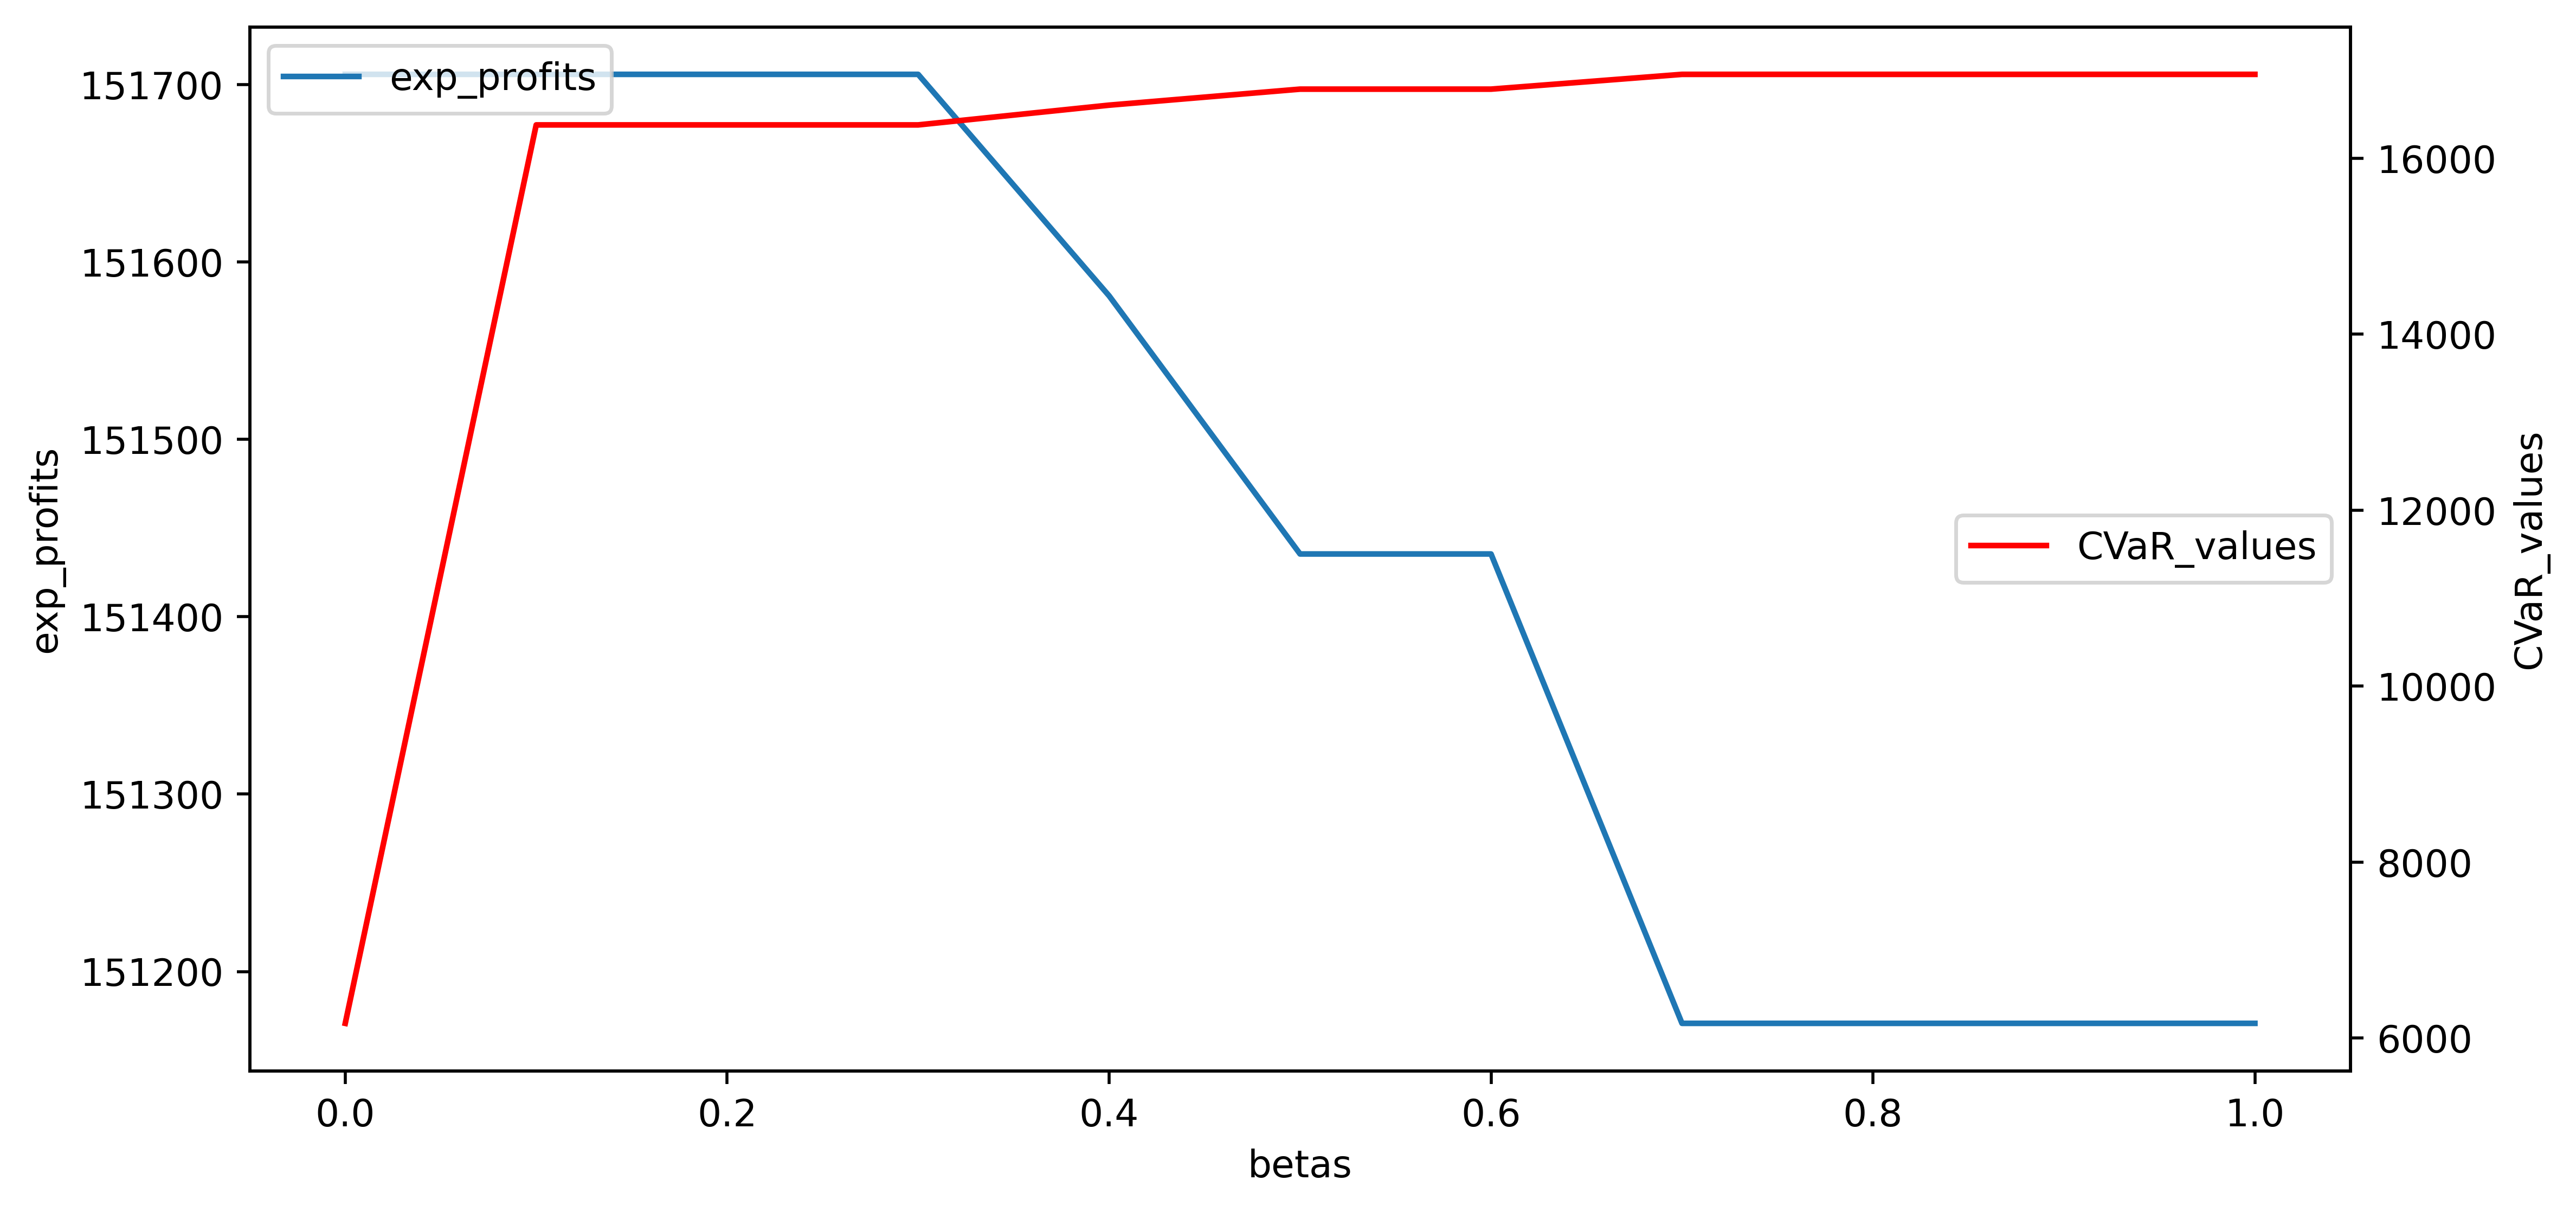

In [8]:
# Plot the data
fig, ax = plt.subplots()
ax.plot(one_price_results['betas'], one_price_results['exp_profits'], label='exp_profits')
ax.set_xlabel('betas')
ax.set_ylabel('exp_profits')
plt.legend( loc='upper left')

ax2 = ax.twinx()
ax2.plot(one_price_results['betas'], one_price_results['CVaR_values'], label='CVaR_values', color='r')
ax2.set_ylabel('CVaR_values')

plt.legend(loc='center right')


plt.show()

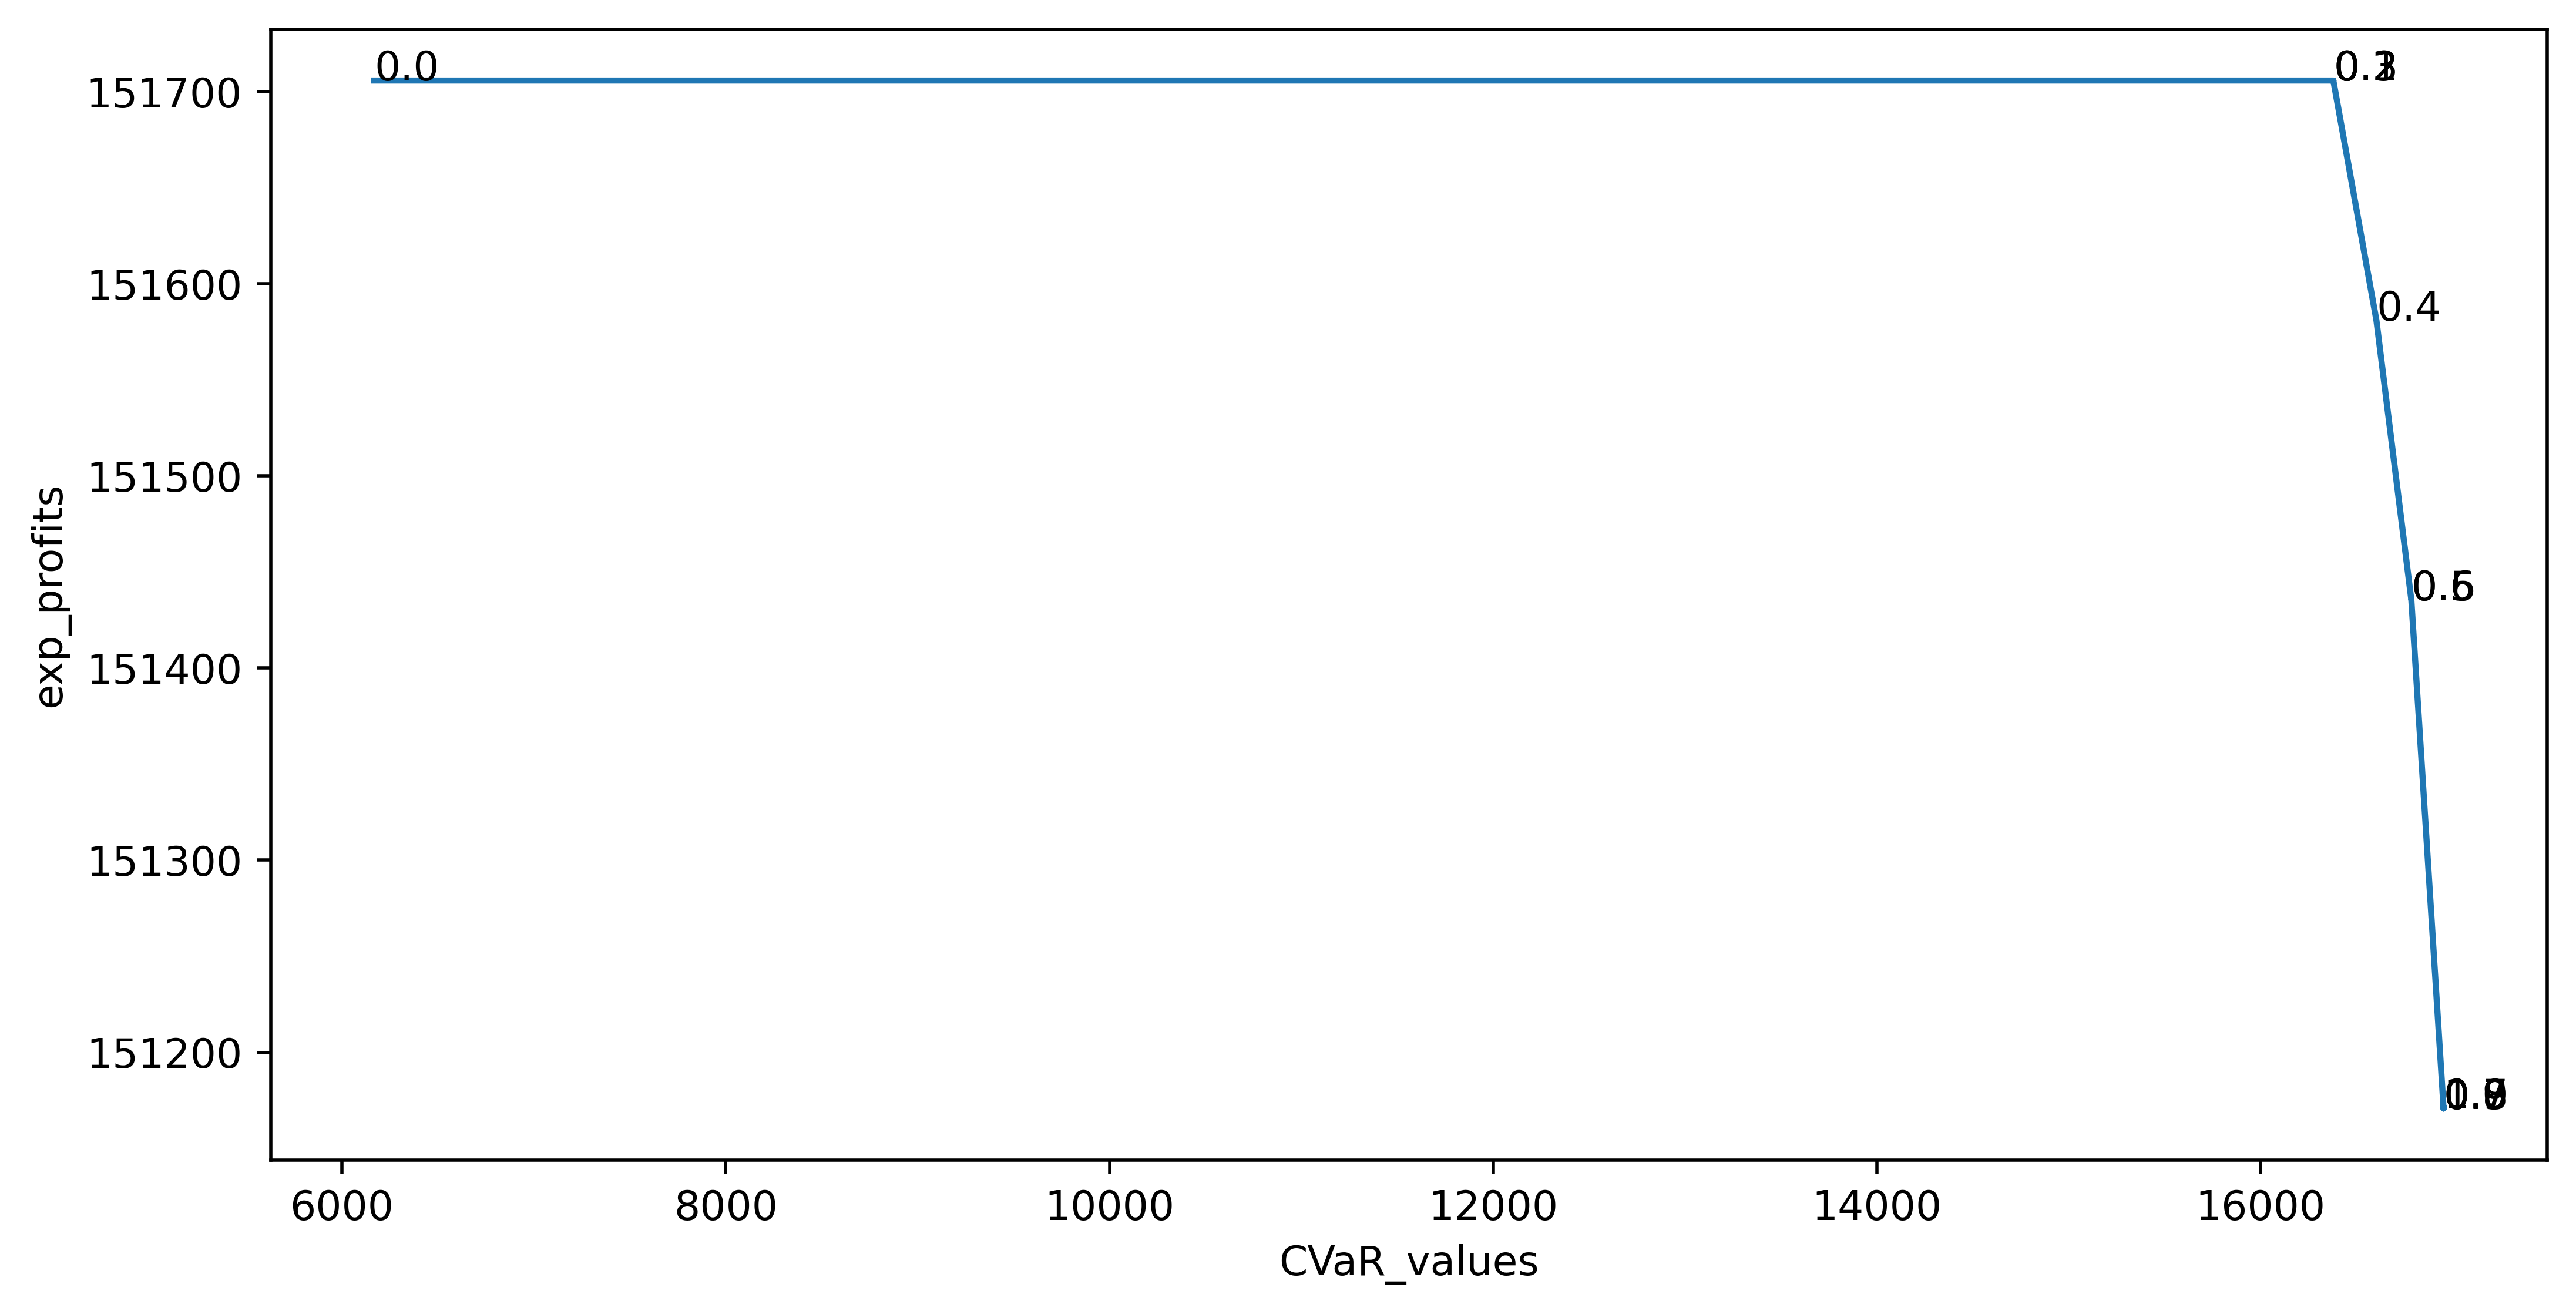

In [9]:
# plot the CVar values on x, the expected profit on y, and betas as marked points
fig, ax = plt.subplots()
ax.plot(one_price_results['CVaR_values'], one_price_results['exp_profits'])
ax.set_xlabel('CVaR_values')
ax.set_ylabel('exp_profits')
for i, txt in enumerate(one_price_results['betas']):
    ax.annotate(txt, (one_price_results['CVaR_values'][i], one_price_results['exp_profits'][i]))
plt.show()


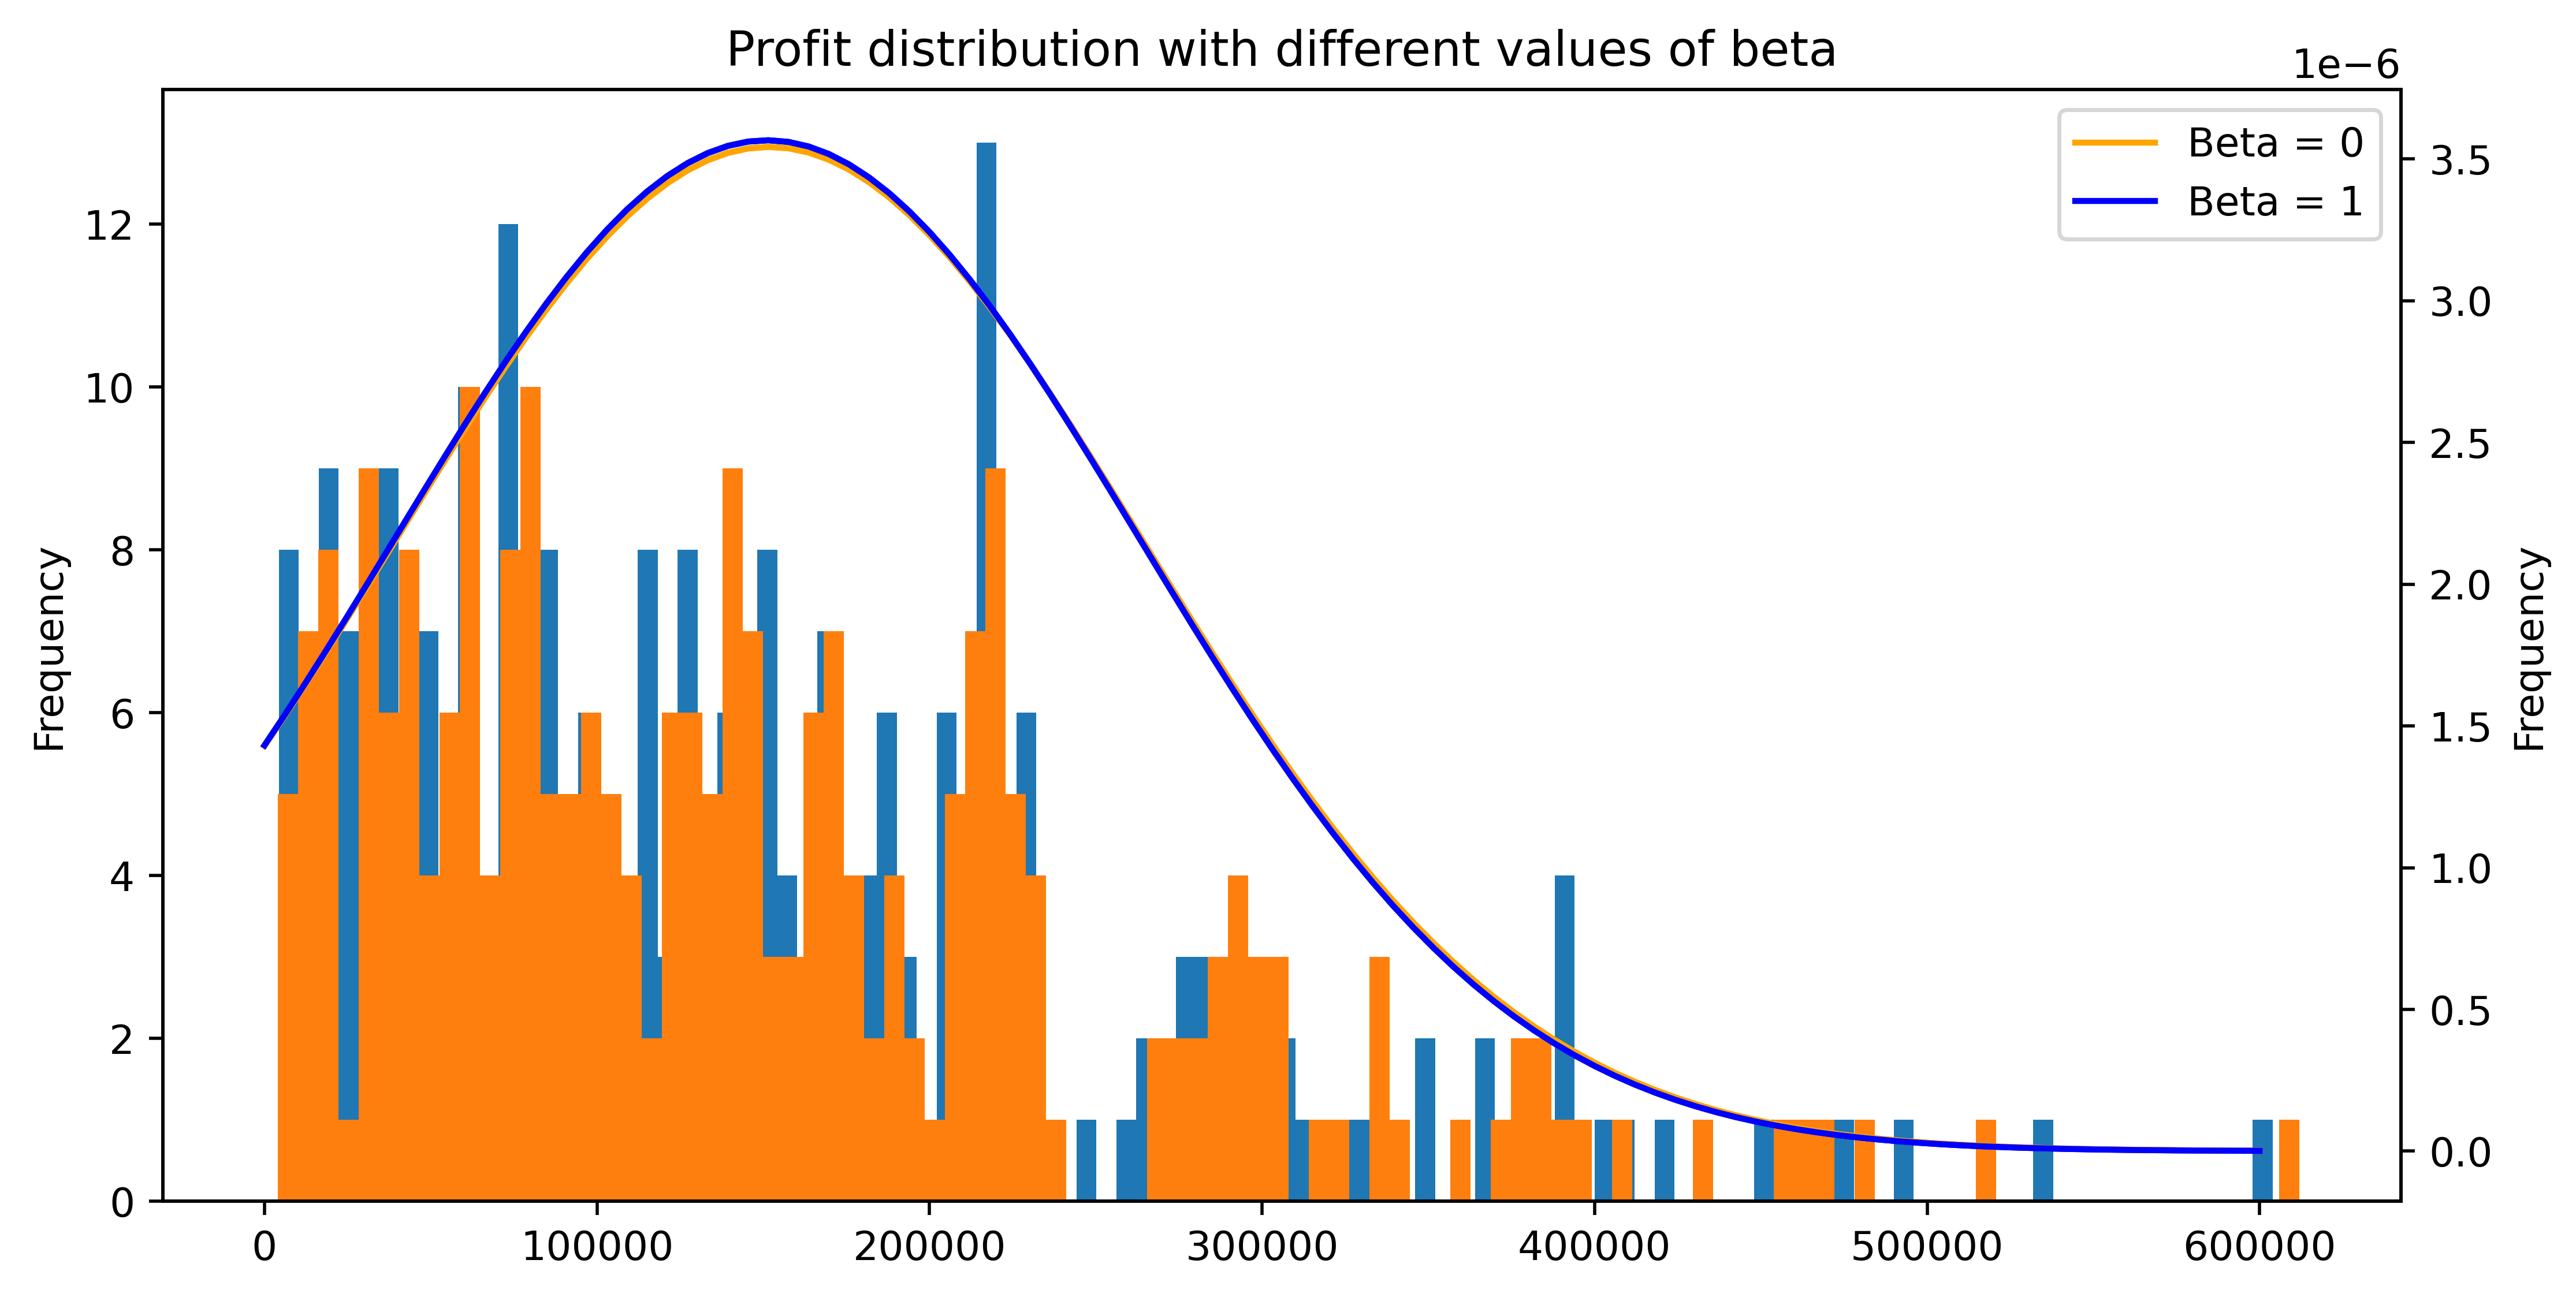

In [10]:
# load 1_3_results/one_price_profits 
one_price_profits = pd.read_csv('1_3_results/one_price_profits.csv')

# drop the first column of the dataframe
one_price_profits = one_price_profits.drop(one_price_profits.columns[0], axis=1)

# switch the columns and rows
one_price_profits = one_price_profits.T

# get the mean and std of the profits
mean_beta_0 = one_price_profits[0][:].mean()
std_beta_0 = one_price_profits[0][:].std()
mean_beta_1 = one_price_profits[10][:].mean()
std_beta_1 = one_price_profits[10][:].std()
# plot the profits distribution for beta with histograms

fig, ax1 = plt.subplots()
one_price_profits[0].plot(kind='hist', bins=100, ax=ax1)
one_price_profits[10].plot(kind='hist', bins=100, ax=ax1)
ax2 = ax1.twinx()
x = np.linspace(0, 600000, 100)
y_0 = (1/(std_beta_0*np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean_beta_0)/std_beta_0)**2)
y_1 = (1/(std_beta_1*np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean_beta_1)/std_beta_1)**2)
ax2.plot(x, y_0, 'orange')
ax2.plot(x, y_1, 'b')

# Add label for the bell curve plots
ax2.plot(x, y_0, 'orange', label='Beta = 0')
ax2.plot(x, y_1, 'b', label='Beta = 1')

# Add the legend to the plot
ax2.legend(loc='upper right')

plt.title('Profit distribution with different values of beta')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


In [11]:
# get the mean and standard deviation of the profits
mu = one_price_profits.mean()
sigma = one_price_profits.std()

print(mu)
print(sigma)

0     151705.658298
1     151705.658298
2     151705.658298
3     151705.658298
4     151580.836859
5     151435.336142
6     151435.336142
7     151170.800950
8     151170.800950
9     151170.800950
10    151170.800950
dtype: float64
0     112615.203718
1     112615.203718
2     112615.203718
3     112615.203718
4     112471.641489
5     112156.993761
6     112156.993761
7     111879.720089
8     111879.720089
9     111879.720089
10    111879.720089
dtype: float64


# Alpha sensitivty

In [12]:
# load the 1_3_results/one_price_results_summary
one_price_results_summary = pd.read_csv('1_3_results/one_price_results_summary.csv')

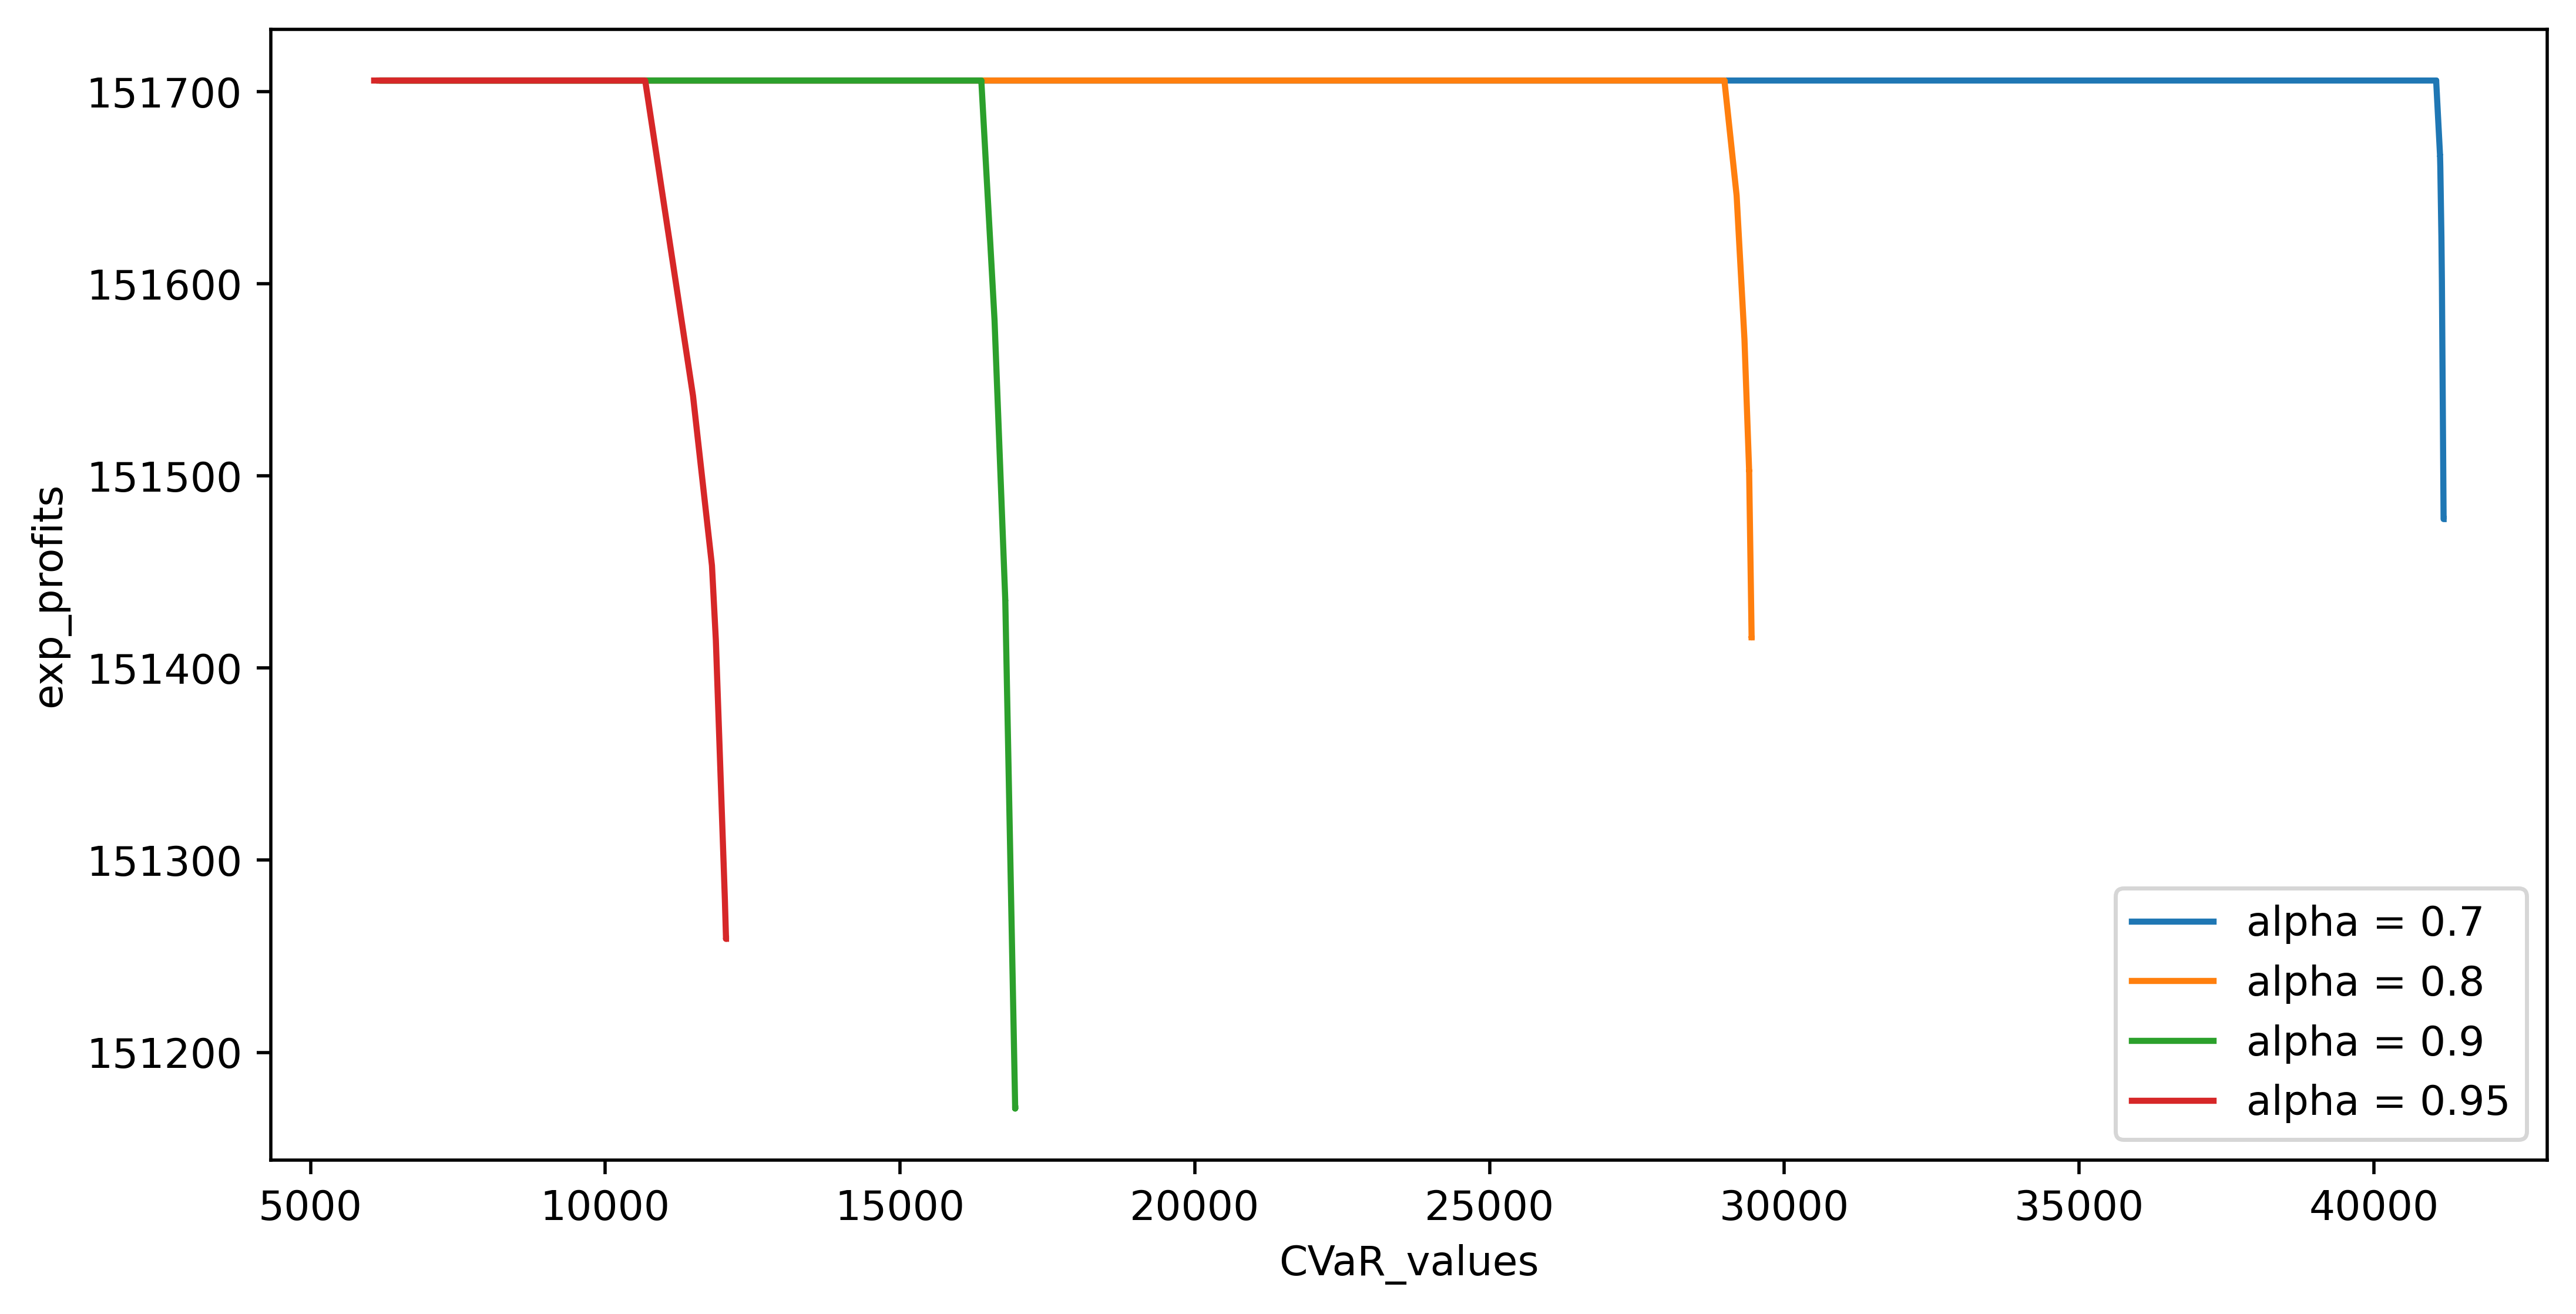

In [13]:
alphas = [0.7, 0.8, 0.9, 0.95]
# do the same graph than before, but with one_price_results_summary, and one line for each alpha
fig, ax = plt.subplots()
for alpha in alphas:
    one_price_results_summary_alpha = one_price_results_summary[one_price_results_summary['alpha'] == alpha]
    ax.plot(one_price_results_summary_alpha['CVaR_values'], one_price_results_summary_alpha['exp_profits'], label='alpha = ' + str(alpha))
ax.set_xlabel('CVaR_values')
ax.set_ylabel('exp_profits')
plt.legend(loc='lower right')
plt.show()

